In [22]:
mode = "png"

import matplotlib
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

import matplotlib
from matplotlib import pyplot as plt

In [5]:
import networkx as nx
import numpy as np

# create an undirected network G
G = nx.Graph()
# add the nodes like before
G.add_node("SI", pos=(2,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,1.7))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

# specify boroughs that are connected to one another
pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

A = nx.to_numpy_array(G)

In [9]:
def in_degree(A):
    """
    A function to compute the in-degrees for the nodes of an adjacency matrix.
    """
    return A.sum(axis=1)

def out_degree(A):
    """
    A function to compute the out-degrees for the nodes of an adjacency matrix.
    """
    return A.sum(axis=0)

# in-degree matrix
D_in = np.diag(in_degree(A))
# out-degree matrix
D_out = np.diag(out_degree(A))
# network is undirected, so in and out degrees are same
print(np.all(D_in == D_out))
# True
# arbitrarily set degree matrix to in-degree matrix
D = D_in

True


In [10]:
L = D - A

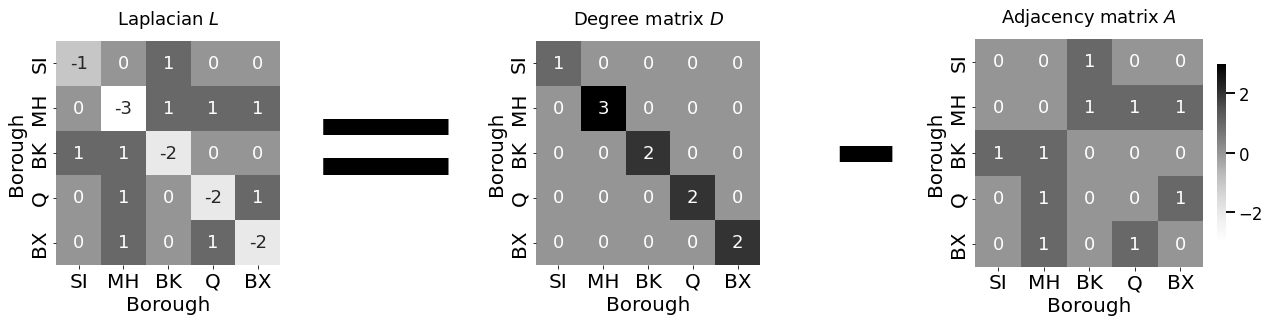

In [58]:
from graphbook_code import heatmap
import seaborn as sns

fig, axs = plt.subplots(1, 5, figsize=(18,5), gridspec_kw={"width_ratios": [1, .2, 1, .02, 1.27]})

global_min = np.floor(np.min((np.min(L), np.min(A), np.min(D))))
global_max = np.ceil(np.max((np.max(L), np.max(A), np.max(D))))
heatmap(L.astype(float), cbar=False, vmin=global_min, vmax=global_max,
        ax=axs[0], title="Laplacian $L$", annot=True,
        xticklabels=["SI", "MH", "BK", "Q", "BX"],
        yticklabels=["SI", "MH", "BK", "Q", "BX"],
        xtitle="Borough", ytitle="Borough")
heatmap(D.astype(float), cbar=False, vmin=global_min, vmax=global_max,
        ax=axs[2], title="Degree matrix $D$", annot=True,
        xticklabels=["SI", "MH", "BK", "Q", "BX"],
        yticklabels=["SI", "MH", "BK", "Q", "BX"],
        xtitle="Borough", ytitle="Borough")
heatmap(A.astype(float), vmin=global_min, vmax=global_max,
        ax=axs[4], title="Adjacency matrix $A$", annot=True,
        xticklabels=["SI", "MH", "BK", "Q", "BX"],
        yticklabels=["SI", "MH", "BK", "Q", "BX"],
        xtitle="Borough", ytitle="Borough")
axs[1].text(x=0, y=.5, s="=", fontsize=200, 
            va='center', ha='center')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
sns.despine(ax=axs[1], left=True, bottom=True)
axs[3].text(x=0, y=.5, s="-", fontsize=200, 
            va='center', ha='center')
axs[3].get_xaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)
sns.despine(ax=axs[3], left=True, bottom=True)
fig.tight_layout()
fig.savefig("Figures/simple_lapl.{}".format(mode))

In [59]:
from graspologic.utils import to_laplacian
L_sym = to_laplacian(A, form="I-DAD")

In [60]:
L_dad = to_laplacian(A, form="DAD")

In [61]:
tau = 1
L_rdad = to_laplacian(A, form="R-DAD", regularizer=tau)

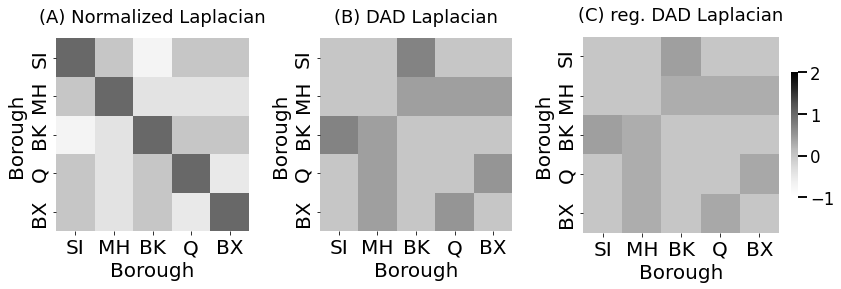

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), gridspec_kw={"width_ratios": [1,1,1.27]})

global_min = np.floor(np.min((np.min(L_sym), np.min(L_dad), np.min(L_rdad))))
global_max = np.ceil(np.max((np.max(L_sym), np.max(L_dad), np.max(L_rdad))))
heatmap(L_sym.astype(float), cbar=False, vmin=global_min, vmax=global_max,
        ax=axs[0], title="(A) Normalized Laplacian",
        xticklabels=["SI", "MH", "BK", "Q", "BX"],
        yticklabels=["SI", "MH", "BK", "Q", "BX"],
        xtitle="Borough", ytitle="Borough")
heatmap(L_dad.astype(float), cbar=False, vmin=global_min, vmax=global_max,
        ax=axs[1], title="(B) DAD Laplacian",
        xticklabels=["SI", "MH", "BK", "Q", "BX"],
        yticklabels=["SI", "MH", "BK", "Q", "BX"],
        xtitle="Borough", ytitle="Borough")
heatmap(L_rdad.astype(float), vmin=global_min, vmax=global_max,
        ax=axs[2], title="(C) reg. DAD Laplacian",
        xticklabels=["SI", "MH", "BK", "Q", "BX"],
        yticklabels=["SI", "MH", "BK", "Q", "BX"],
        xtitle="Borough", ytitle="Borough", shrink=.4)
fig.tight_layout()
fig.savefig("Figures/normlapls.{}".format(mode))